In [133]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [168]:
df = pd.read_excel('C:/Users/user/OneDrive/Рабочий стол/Доп учеба/Хакатоны/ЦП 3 дашборд/train_dataset_rzhd_rating_train/dataset.xlsx')

In [169]:
df.head()

,Наименование полигона,Краткое наименование,Полигон,Номерной знак ТС,Наименование структурного подразделения,Тип закрепления,Выполняемые функции,Должность за кем закреплен ТС,дата путевого листа,"Данные путевых листов, пробег",Дата сигнала телематики,"Данные телематики, пробег",Штрафы,манера вождения
0,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,NaN,NaN,2024-04-01,158.0,2024-04-01,140.26,17.0,3.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-04,9.0,2024-04-02,3.00,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-08,5.0,2024-04-08,5.00,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-09,7.0,2024-04-09,7.00,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-10,12.0,2024-04-10,12.00,2.0,NaN


In [170]:
df = df.dropna(how='all')
df = df.drop(['Выполняемые функции', 'Должность за кем закреплен ТС'], axis=1)

In [171]:
df['Наименование полигона'] = df['Наименование полигона'].fillna(method='ffill')
df['Краткое наименование'] = df['Краткое наименование'].fillna(method='ffill')
df['Полигон'] = df['Полигон'].fillna(method='ffill')
df['Номерной знак ТС'] = df['Номерной знак ТС'].fillna(method='ffill')
df['Тип закрепления'] = df['Тип закрепления'].fillna(method='ffill')
df['Наименование структурного подразделения'] = df['Наименование структурного подразделения'].fillna(method='ffill')
df['манера вождения'] = df['манера вождения'].fillna(method='ffill')
df['Штрафы'] = df['Штрафы'].fillna(0)

In [175]:
agg_cols1 = ['Наименование полигона', 'Краткое наименование', 'Полигон', 'Номерной знак ТС', 'Наименование структурного подразделения', 'Тип закрепления']
grouped = df.groupby(agg_cols1)
new_dfs = []
for group, data in grouped:
    temp1_df = data.drop(columns=['Дата сигнала телематики', 'Данные телематики, пробег','Штрафы', 'манера вождения']).rename(columns={'дата путевого листа': 'Дата'})
    pd.DataFrame({'Дата': data['дата путевого листа'], 'Данные путевых листов, пробег': data['Данные путевых листов, пробег']})
    temp2_df = data.drop(columns=['дата путевого листа', 'Данные путевых листов, пробег']).rename(columns={'Дата сигнала телематики': 'Дата'})
    new_df = pd.merge(temp1_df, temp2_df,how='outer',on=['Дата']+agg_cols1 ).sort_values(by='Дата')
    new_df = new_df.dropna(subset='Дата')
    new_dfs.append(new_df)
final_df = pd.concat(new_dfs).reset_index(drop=True)

In [173]:
final_df.head(5)

,Наименование полигона,Краткое наименование,Полигон,Номерной знак ТС,Наименование структурного подразделения,Тип закрепления,Дата,"Данные путевых листов, пробег","Данные телематики, пробег",Штрафы,манера вождения
0,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,0000КЕ43,ДМУ-3,В целевой структуре парка,2024-04-05,47.0,NaN,NaN,NaN
1,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,0000КЕ43,ДМУ-3,В целевой структуре парка,2024-04-18,90.0,NaN,NaN,NaN
2,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,0000КЕ43,ДМУ-3,В целевой структуре парка,2024-04-27,110.0,NaN,NaN,NaN
3,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,0000КЕ43,ДМУ-3,В целевой структуре парка,2024-04-30,33.0,NaN,NaN,NaN
4,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,0003КЕ43,ДМУ-3,В целевой структуре парка,2024-04-01,45.0,40.0,2.0,4.9


In [44]:
df.isna().sum()

Наименование полигона                         0
Краткое наименование                          0
Полигон                                       0
Номерной знак ТС                              0
Наименование структурного подразделения       0
Тип закрепления                               0
дата путевого листа                        1288
Данные путевых листов, пробег               832
Дата сигнала телематики                    1514
Данные телематики, пробег                  1063
Штрафы                                        0
манера вождения                               0
dtype: int64

In [174]:
df['дата путевого листа'] = pd.to_datetime(df['дата путевого листа'], format='%Y-%m-%d')
df['Дата сигнала телематики'] = pd.to_datetime(df['Дата сигнала телематики'], format='%Y-%m-%d')
# поменять
df['Поездка не по плану'] = df.apply(lambda row: 1 if pd.isna(row['дата путевого листа']) and not pd.isna(row['Дата сигнала телематики']) else 0, axis=1)
df['Не выполнил поездку'] = df.apply(lambda row: 1 if not pd.isna(row['дата путевого листа']) and pd.isna(row['Дата сигнала телематики']) else 0, axis=1)
df['Разница план_реальность(дни)'] = df.apply(lambda row: (row['дата путевого листа'] - row['Дата сигнала телематики']).days if not pd.isna(row['дата путевого листа']) and not pd.isna(row['Дата сигнала телематики']) else None, axis=1)
df['Разница план_реальность(дни)'] = df['Разница план_реальность(дни)'].fillna(0)
df.head()

,Наименование полигона,Краткое наименование,Полигон,Номерной знак ТС,Наименование структурного подразделения,Тип закрепления,дата путевого листа,"Данные путевых листов, пробег",Дата сигнала телематики,"Данные телематики, пробег",Штрафы,манера вождения,Поездка не по плану,Не выполнил поездку,Разница план_реальность(дни)
0,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-01,158.0,2024-04-01,140.26,17.0,3.5,0,0,0.0
1,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-04,9.0,2024-04-02,3.00,1.0,3.5,0,0,2.0
2,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-08,5.0,2024-04-08,5.00,1.0,3.5,0,0,0.0
3,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-09,7.0,2024-04-09,7.00,0.0,3.5,0,0,0.0
4,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-10,12.0,2024-04-10,12.00,2.0,3.5,0,0,0.0


In [10]:
df.isna().sum()

Наименование полигона                         0
Краткое наименование                          0
Полигон                                       0
Номерной знак ТС                              0
Наименование структурного подразделения       0
Тип закрепления                               0
дата путевого листа                        1288
Данные путевых листов, пробег               832
Дата сигнала телематики                    1514
Данные телематики, пробег                  1063
Штрафы                                        0
манера вождения                               0
Поездка не по плану                           0
Не выполнил поездку                           0
Разница план_реальность(дни)                  0
dtype: int64

In [11]:
df.head()

,Наименование полигона,Краткое наименование,Полигон,Номерной знак ТС,Наименование структурного подразделения,Тип закрепления,дата путевого листа,"Данные путевых листов, пробег",Дата сигнала телематики,"Данные телематики, пробег",Штрафы,манера вождения,Поездка не по плану,Не выполнил поездку,Разница план_реальность(дни)
0,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-01,158.0,2024-04-01,140.26,17.0,3.5,0,0,0.0
1,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-04,9.0,2024-04-02,3.00,1.0,3.5,0,0,2.0
2,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-08,5.0,2024-04-08,5.00,1.0,3.5,0,0,0.0
3,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-09,7.0,2024-04-09,7.00,0.0,3.5,0,0,0.0
4,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-10,12.0,2024-04-10,12.00,2.0,3.5,0,0,0.0


In [138]:
columns_to_check = [
    "Наименование полигона", "Краткое наименование", "Полигон", 
    "Номерной знак ТС", "Наименование структурного подразделения", "Тип закрепления"
]
df = df.reset_index(drop=True)

def remove_changed_rows(df, columns):
    indices_to_remove = []
    previous_row = df.iloc[0][columns]

    for i in range(0, len(df)):
        current_row = df.iloc[i][columns]
        if not current_row.equals(previous_row):
            indices_to_remove.append(i)
            previous_row = current_row

    df_removed = df.iloc[indices_to_remove]
    df_cleaned = df.drop(indices_to_remove)
    return df_cleaned, df_removed

df_cleaned, df_removed = remove_changed_rows(df, columns_to_check)
df = df_cleaned
df = df.reset_index(drop=True)

In [139]:
df

,Наименование полигона,Краткое наименование,Полигон,Номерной знак ТС,Наименование структурного подразделения,Тип закрепления,дата путевого листа,"Данные путевых листов, пробег",Дата сигнала телематики,"Данные телематики, пробег",Штрафы,манера вождения
0,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-01,158.0,2024-04-01,140.26,17.0,3.5
1,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-04,9.0,2024-04-02,3.00,1.0,3.5
2,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-08,5.0,2024-04-08,5.00,1.0,3.5
3,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-09,7.0,2024-04-09,7.00,0.0,3.5
4,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-10,12.0,2024-04-10,12.00,2.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-27,26.0,2024-04-27,26.52,0.0,5.2
3932,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-28,8.0,2024-04-28,8.00,0.0,5.2
3933,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-30,46.0,2024-04-30,46.00,0.0,5.2
3934,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,М777КХ07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-05,3.0,NaT,NaN,14.0,3.2


In [14]:
# df['штраф на км'] = df.apply(lambda row: row['Штрафы'] / row['Данные телематики, пробег'] if row['Данные телематики, пробег'] else None, axis=1)

In [15]:
one_hot_encoder = OneHotEncoder()

one_hot_encoded = one_hot_encoder.fit_transform(df[['Тип закрепления']])
df_one_hot = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['Тип закрепления']))
df = pd.concat([df.drop('Тип закрепления', axis=1), df_one_hot], axis=1)
df.head()

,Наименование полигона,Краткое наименование,Полигон,Номерной знак ТС,Наименование структурного подразделения,дата путевого листа,"Данные путевых листов, пробег",Дата сигнала телематики,"Данные телематики, пробег",Штрафы,манера вождения,Поездка не по плану,Не выполнил поездку,Разница план_реальность(дни),Тип закрепления_В целевой структуре парка,Тип закрепления_Прочие
0,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,2024-04-01,158.0,2024-04-01,140.26,17.0,3.5,0,0,0.0,1.0,0.0
1,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,2024-04-04,9.0,2024-04-02,3.00,1.0,3.5,0,0,2.0,1.0,0.0
2,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,2024-04-08,5.0,2024-04-08,5.00,1.0,3.5,0,0,0.0,1.0,0.0
3,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,2024-04-09,7.0,2024-04-09,7.00,0.0,3.5,0,0,0.0,1.0,0.0
4,ОКТЯБРЬСКАЯ ЖД,ЦМ,Окт ДМ,Б/Н,ГТС Выборг,2024-04-10,12.0,2024-04-10,12.00,2.0,3.5,0,0,0.0,1.0,0.0


In [16]:
df.isna().sum()

Наименование полигона                           0
Краткое наименование                            0
Полигон                                         0
Номерной знак ТС                                0
Наименование структурного подразделения         0
дата путевого листа                           841
Данные путевых листов, пробег                 831
Дата сигнала телематики                      1067
Данные телематики, пробег                    1058
Штрафы                                          0
манера вождения                                 0
Поездка не по плану                             0
Не выполнил поездку                             0
Разница план_реальность(дни)                    0
Тип закрепления_В целевой структуре парка       0
Тип закрепления_Прочие                          0
dtype: int64

In [17]:
# делить на данные путевых листов и учесть, что даты перемешаны
df['temp'] = abs(df['Данные путевых листов, пробег'] - df['Данные телематики, пробег']) / df['Данные телематики, пробег']
def calculate_coefficient(temp):
    if temp == 0:
        return 1
    elif temp >= 0.2:
        return 0.6
    elif temp >= 0.1:
        return 0.7
    else:
        return 0.8
df['Кэф путевого отклонения'] = df['temp'].apply(lambda x: calculate_coefficient(x))
df.drop(columns=['temp'], inplace=True)

In [18]:
df['Кэф путевого отклонения'].value_counts()

0.8    2002
1.0    1374
0.6     514
0.7      46
Name: Кэф путевого отклонения, dtype: int64

In [19]:
aggregations = {
    'Данные путевых листов, пробег': 'sum',
    'Данные телематики, пробег': 'sum',
    'Штрафы': 'sum',
    'Тип закрепления_В целевой структуре парка': 'sum',
    'Тип закрепления_Прочие': 'sum',
    'манера вождения': 'mean',
    'Разница план_реальность(дни)': 'mean',
    'Поездка не по плану': 'max',
    'Не выполнил поездку': 'mean',
    'Кэф путевого отклонения': 'mean'
}
agg_cols = ['Наименование полигона', 'Краткое наименование', 'Полигон', 'Наименование структурного подразделения', 'дата путевого листа']
agg_df = df.groupby(agg_cols).agg(aggregations).reset_index()
agg_df['количество записей'] = df.groupby(agg_cols).size().reset_index(name='количество записей')['количество записей']


In [20]:
agg_df.head()

,Наименование полигона,Краткое наименование,Полигон,Наименование структурного подразделения,дата путевого листа,"Данные путевых листов, пробег","Данные телематики, пробег",Штрафы,Тип закрепления_В целевой структуре парка,Тип закрепления_Прочие,манера вождения,Разница план_реальность(дни),Поездка не по плану,Не выполнил поездку,Кэф путевого отклонения,количество записей
0,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-01,5608.41,3355.0,0.0,10.0,1.0,4.763636,-0.272727,0,0.454545,0.836364,11
1,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-02,2889.00,1176.0,0.0,5.0,2.0,4.842857,0.000000,0,0.714286,0.857143,7
2,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-03,4045.00,2070.0,0.0,8.0,2.0,4.760000,0.000000,0,0.500000,0.860000,10
3,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-04,4582.00,2607.0,0.0,8.0,2.0,5.040000,0.000000,0,0.500000,0.900000,10
4,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-05,3756.00,1858.0,0.0,9.0,2.0,4.945455,-0.090909,0,0.636364,0.845455,11


In [21]:
# делить на закрепление в целевой структуре парка
agg_df['temp'] = abs(agg_df['Тип закрепления_В целевой структуре парка'] - agg_df['количество записей']) / agg_df['количество записей']
def calculate_coefficient2(temp): # Кэф соответствия целевой структуре
    if temp == 0:
        return 1
    elif temp >= 0.2:
        return 0.6
    elif temp >= 0.1:
        return 0.7
    else:
        return 0.8
agg_df['Кэф соответствия целевой структуре'] = agg_df['temp'].apply(lambda x: calculate_coefficient2(x))
agg_df.drop(columns=['temp'], inplace=True)

In [22]:
def calculate_coefficient3(temp): # Кэф манера вождения
    temp = 1 - temp/6 
    if temp == 0:
        return 1
    elif temp >= 0.2:
        return 0.7
    elif temp >= 0.15:
        return 0.8
    else:
        return 0.9
agg_df['Кэф манера вождения'] = df['манера вождения'].apply(lambda x: calculate_coefficient(x))
# agg_df.drop(columns=['манера вождения'], inplace=True)

In [23]:
# qcut
def calculate_coefficient(temp, max_val):
    temp = temp/max_val
    if temp >= 0.2:
        return 0.7
    elif temp >= 0.15:
        return 0.8
    else:
        return 0.9
max_val = agg_df['Штрафы'].mean()
agg_df['Кэф Штрафы'] = df['Штрафы'].apply(lambda x: calculate_coefficient(x, max_val))
# agg_df.drop(columns=['манера вождения'], inplace=True)

In [24]:
agg_df.head()

,Наименование полигона,Краткое наименование,Полигон,Наименование структурного подразделения,дата путевого листа,"Данные путевых листов, пробег","Данные телематики, пробег",Штрафы,Тип закрепления_В целевой структуре парка,Тип закрепления_Прочие,манера вождения,Разница план_реальность(дни),Поездка не по плану,Не выполнил поездку,Кэф путевого отклонения,количество записей,Кэф соответствия целевой структуре,Кэф манера вождения,Кэф Штрафы
0,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-01,5608.41,3355.0,0.0,10.0,1.0,4.763636,-0.272727,0,0.454545,0.836364,11,0.8,0.7,0.7
1,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-02,2889.00,1176.0,0.0,5.0,2.0,4.842857,0.000000,0,0.714286,0.857143,7,0.6,0.7,0.9
2,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-03,4045.00,2070.0,0.0,8.0,2.0,4.760000,0.000000,0,0.500000,0.860000,10,0.6,0.7,0.9
3,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-04,4582.00,2607.0,0.0,8.0,2.0,5.040000,0.000000,0,0.500000,0.900000,10,0.6,0.7,0.9
4,ГОРЬКОВСКАЯ ЖД,ЦМ,Горьковская дир,ДМУ-2,2024-04-05,3756.00,1858.0,0.0,9.0,2.0,4.945455,-0.090909,0,0.636364,0.845455,11,0.7,0.7,0.9


In [25]:
agg_df['grade'] = 0.4*agg_df['Кэф путевого отклонения'] + 0.3*agg_df['Кэф соответствия целевой структуре'] + 0.15*agg_df['Кэф Штрафы'] + 0.15*agg_df['Кэф манера вождения']

In [26]:
def add_rolling_mean_features(df, window_size):
    df = df.sort_values(by=['Наименование структурного подразделения', 'дата путевого листа'])
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    for col in numeric_cols:
        df[f'{col}_rolling_mean'] = df.groupby('Наименование полигона')[col].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return df
window_size = 7
df_rolling_vals = add_rolling_mean_features(agg_df, window_size)

In [ ]:
df_rolling_vals['День недели'] = df_rolling_vals['дата путевого листа'].dt.day_name()
df_rolling_vals['Дата'] = df_rolling_vals['дата путевого листа'].dt.date
df_rolling_vals = df_rolling_vals.drop(columns=['дата путевого листа'])

In [27]:
pd.set_option('display.max_columns', 500)
df_rolling_vals.head()

,Наименование полигона,Краткое наименование,Полигон,Наименование структурного подразделения,дата путевого листа,"Данные путевых листов, пробег","Данные телематики, пробег",Штрафы,Тип закрепления_В целевой структуре парка,Тип закрепления_Прочие,манера вождения,Разница план_реальность(дни),Поездка не по плану,Не выполнил поездку,Кэф путевого отклонения,количество записей,Кэф соответствия целевой структуре,Кэф манера вождения,Кэф Штрафы,grade,"Данные путевых листов, пробег_rolling_mean","Данные телематики, пробег_rolling_mean",Штрафы_rolling_mean,Тип закрепления_В целевой структуре парка_rolling_mean,Тип закрепления_Прочие_rolling_mean,манера вождения_rolling_mean,Разница план_реальность(дни)_rolling_mean,Поездка не по плану_rolling_mean,Не выполнил поездку_rolling_mean,Кэф путевого отклонения_rolling_mean,количество записей_rolling_mean,Кэф соответствия целевой структуре_rolling_mean,Кэф манера вождения_rolling_mean,Кэф Штрафы_rolling_mean,grade_rolling_mean
294,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-01,8655.0,6260.85,0.0,16.0,0.0,5.100000,-1.187500,0,0.062500,0.850000,16,1.0,0.8,0.9,0.895000,8655.000000,6260.850000,0.0,16.00,0.0,5.100000,-1.187500,0.0,0.062500,0.850000,16.00,1.0,0.8,0.9,0.895000
295,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-02,5487.0,5564.65,0.0,16.0,0.0,5.118750,-2.062500,0,0.250000,0.850000,16,1.0,0.8,0.9,0.895000,7071.000000,5912.750000,0.0,16.00,0.0,5.109375,-1.625000,0.0,0.156250,0.850000,16.00,1.0,0.8,0.9,0.895000
296,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-03,4781.0,5253.36,0.0,13.0,0.0,5.007692,-1.615385,0,0.230769,0.861538,13,1.0,0.8,0.9,0.899615,6307.666667,5692.953333,0.0,15.00,0.0,5.075481,-1.621795,0.0,0.181090,0.853846,15.00,1.0,0.8,0.9,0.896538
297,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-04,4439.0,3330.00,0.0,14.0,0.0,5.078571,-0.642857,0,0.357143,0.900000,14,1.0,0.8,0.9,0.915000,5840.500000,5102.215000,0.0,14.75,0.0,5.076253,-1.377060,0.0,0.225103,0.865385,14.75,1.0,0.8,0.9,0.901154
298,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-05,6603.0,5626.13,14.0,20.0,0.0,4.990000,-0.750000,0,0.300000,0.890000,20,1.0,0.8,0.9,0.911000,5993.000000,5206.998000,2.8,15.80,0.0,5.059003,-1.251648,0.0,0.240082,0.870308,15.80,1.0,0.8,0.9,0.903123


In [30]:
df_rolling_vals

,Наименование полигона,Краткое наименование,Полигон,Наименование структурного подразделения,дата путевого листа,"Данные путевых листов, пробег","Данные телематики, пробег",Штрафы,Тип закрепления_В целевой структуре парка,Тип закрепления_Прочие,манера вождения,Разница план_реальность(дни),Поездка не по плану,Не выполнил поездку,Кэф путевого отклонения,количество записей,Кэф соответствия целевой структуре,Кэф манера вождения,Кэф Штрафы,grade,"Данные путевых листов, пробег_rolling_mean","Данные телематики, пробег_rolling_mean",Штрафы_rolling_mean,Тип закрепления_В целевой структуре парка_rolling_mean,Тип закрепления_Прочие_rolling_mean,манера вождения_rolling_mean,Разница план_реальность(дни)_rolling_mean,Поездка не по плану_rolling_mean,Не выполнил поездку_rolling_mean,Кэф путевого отклонения_rolling_mean,количество записей_rolling_mean,Кэф соответствия целевой структуре_rolling_mean,Кэф манера вождения_rolling_mean,Кэф Штрафы_rolling_mean,grade_rolling_mean
294,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-01,8655.00,6260.85,0.0,16.0,0.0,5.100000,-1.187500,0,0.062500,0.850000,16,1.0,0.8,0.9,0.895000,8655.000000,6260.850000,0.000000,16.000000,0.0,5.100000,-1.187500,0.0,0.062500,0.850000,16.000000,1.0,0.800000,0.9,0.895000
295,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-02,5487.00,5564.65,0.0,16.0,0.0,5.118750,-2.062500,0,0.250000,0.850000,16,1.0,0.8,0.9,0.895000,7071.000000,5912.750000,0.000000,16.000000,0.0,5.109375,-1.625000,0.0,0.156250,0.850000,16.000000,1.0,0.800000,0.9,0.895000
296,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-03,4781.00,5253.36,0.0,13.0,0.0,5.007692,-1.615385,0,0.230769,0.861538,13,1.0,0.8,0.9,0.899615,6307.666667,5692.953333,0.000000,15.000000,0.0,5.075481,-1.621795,0.0,0.181090,0.853846,15.000000,1.0,0.800000,0.9,0.896538
297,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-04,4439.00,3330.00,0.0,14.0,0.0,5.078571,-0.642857,0,0.357143,0.900000,14,1.0,0.8,0.9,0.915000,5840.500000,5102.215000,0.000000,14.750000,0.0,5.076253,-1.377060,0.0,0.225103,0.865385,14.750000,1.0,0.800000,0.9,0.901154
298,СЕВЕРНАЯ ЖД,ЦМ,Северная ДМ,Архангельская механизированная дистанция ПРР и КО,2024-04-05,6603.00,5626.13,14.0,20.0,0.0,4.990000,-0.750000,0,0.300000,0.890000,20,1.0,0.8,0.9,0.911000,5993.000000,5206.998000,2.800000,15.800000,0.0,5.059003,-1.251648,0.0,0.240082,0.870308,15.800000,1.0,0.800000,0.9,0.903123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,МОСКОВСКАЯ ЖД,ЦМ,Московская ДМ,Орловская механизированная дистанция погрузочн...,2024-04-26,1206.00,897.00,0.0,5.0,0.0,3.100000,0.000000,0,0.400000,0.840000,5,1.0,0.7,0.9,0.876000,703.142857,602.740000,3.000000,6.000000,0.0,3.070136,0.231293,0.0,0.445578,0.842653,6.000000,1.0,0.957143,0.9,0.915633
229,МОСКОВСКАЯ ЖД,ЦМ,Московская ДМ,Орловская механизированная дистанция погрузочн...,2024-04-27,432.00,174.00,5.0,7.0,0.0,3.057143,1.000000,0,0.428571,0.857143,7,1.0,0.7,0.9,0.882857,708.285714,590.597143,2.857143,6.142857,0.0,2.997347,0.326531,0.0,0.459184,0.850816,6.142857,1.0,0.914286,0.9,0.912469
230,МОСКОВСКАЯ ЖД,ЦМ,Московская ДМ,Орловская механизированная дистанция погрузочн...,2024-04-28,1014.00,1013.83,2.0,7.0,0.0,3.514286,2.285714,0,0.285714,0.742857,7,1.0,0.7,0.9,0.837143,727.142857,614.841429,3.142857,6.571429,0.0,2.963673,0.653061,0.0,0.428571,0.835510,6.571429,1.0,0.871429,0.9,0.899918
231,МОСКОВСКАЯ ЖД,ЦМ,Московская ДМ,Орловская механизированная дистанция погрузочн...,2024-04-29,176.11,382.53,6.0,9.0,0.0,2.111111,2.000000,0,0.555556,0.755556,9,1.0,0.7,0.9,0.842222,722.015714,624.060000,4.000000,7.142857,0.0,2.990975,0.938776,0.0,0.422222,0.829161,7.142857,1.0,0.828571,0.9,0.890950


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0680295	test: 0.0682815	best: 0.0682815 (0)	total: 2.95ms	remaining: 2.95s
100:	learn: 0.0503850	test: 0.0558082	best: 0.0558082 (100)	total: 233ms	remaining: 2.08s
200:	learn: 0.0419423	test: 0.0519318	best: 0.0519318 (200)	total: 497ms	remaining: 1.98s
300:	learn: 0.0371237	test: 0.0508341	best: 0.0508317 (292)	total: 735ms	remaining: 1.71s
400:	learn: 0.0339040	test: 0.0504121	best: 0.0504121 (400)	total: 1.02s	remaining: 1.53s
500:	learn: 0.0314876	test: 0.0504674	best: 0.0503166 (419)	total: 1.3s	remaining: 1.29s
600:	learn: 0.0293547	test: 0.0505154	best: 0.0503166 (419)	total: 1.48s	remaining: 983ms
700:	learn: 0.0275849	test: 0.0503726	best: 0.0503166 (419)	total: 1.66s	remaining: 707ms
800:	learn: 0.0259552	test: 0.0502345	best: 0.0502011 (781)	total: 1.97s	remaining: 491ms
900:	learn: 0.0244747	test: 0.0501648	best: 0.0501570 (890)	total: 2.17s	remaining: 238ms
999:	learn: 0.0229856	test: 0.0501729	best: 0.0501172 (985)	total: 2.38s	remaining: 0us

bestTest = 0.05

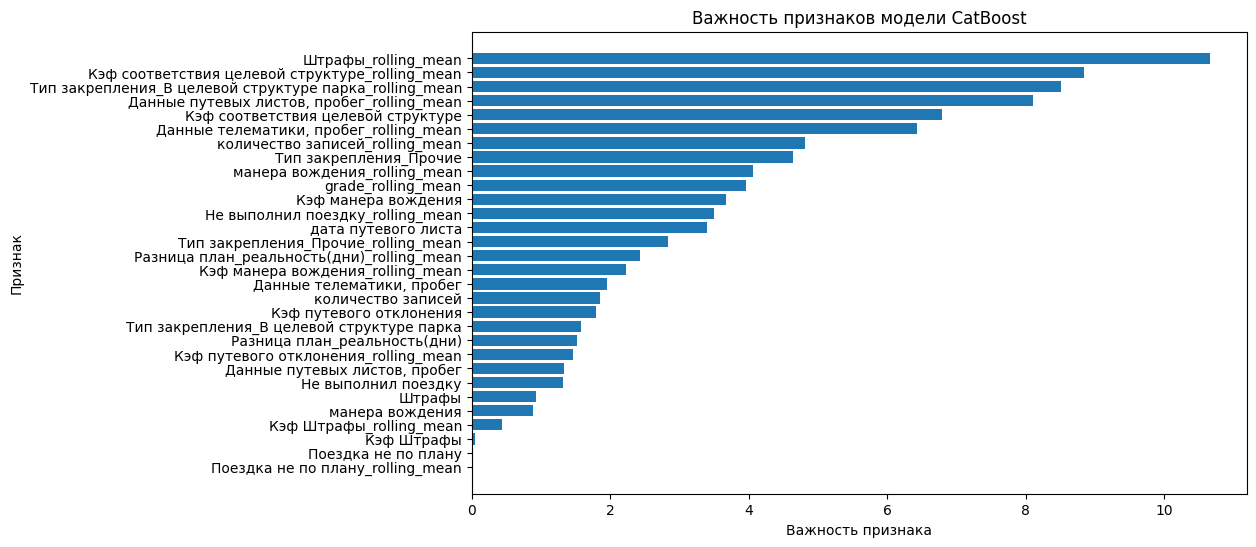

In [33]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
df_rolling_vals['grade'] = df_rolling_vals.groupby('Наименование полигона')['grade'].shift(-7)
df_rolling_vals = df_rolling_vals.dropna(subset=['grade'])
X = df_rolling_vals.drop(columns=['grade', 'Наименование полигона',	'Краткое наименование',	'Полигон',	'Наименование структурного подразделения'])
y = df_rolling_vals['grade']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=4, eval_metric='RMSE', random_seed=42)
train_pool = Pool(X_train, y_train, cat_features=cat_features)
validation_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool, eval_set=validation_pool, verbose=100, plot=True)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE на тесте: {mse}")
print(f"R2 на тесте: {r2}")

feature_importances = model.get_feature_importance()
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Важность признаков модели CatBoost")
plt.gca().invert_yaxis()
plt.show()


In [35]:
df_rolling_vals.columns

Index(['Наименование полигона', 'Краткое наименование', 'Полигон',
       'Наименование структурного подразделения', 'дата путевого листа',
       'Данные путевых листов, пробег', 'Данные телематики, пробег', 'Штрафы',
       'Тип закрепления_В целевой структуре парка', 'Тип закрепления_Прочие',
       'манера вождения', 'Разница план_реальность(дни)',
       'Поездка не по плану', 'Не выполнил поездку', 'Кэф путевого отклонения',
       'количество записей', 'Кэф соответствия целевой структуре',
       'Кэф манера вождения', 'Кэф Штрафы', 'grade',
       'Данные путевых листов, пробег_rolling_mean',
       'Данные телематики, пробег_rolling_mean', 'Штрафы_rolling_mean',
       'Тип закрепления_В целевой структуре парка_rolling_mean',
       'Тип закрепления_Прочие_rolling_mean', 'манера вождения_rolling_mean',
       'Разница план_реальность(дни)_rolling_mean',
       'Поездка не по плану_rolling_mean', 'Не выполнил поездку_rolling_mean',
       'Кэф путевого отклонения_rolling_mean',